In [21]:
import avocado
import os
import sys
main_path = os.path.abspath(os.path.join("knn_test_avocado.ipynb", "..", ".."))
sys.path.insert(0, main_path)
from avocado import utils
import numpy as np

from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import matplotlib.pyplot as plt
import itertools

In [9]:
dataset = avocado.load("plasticc_test", metadata_only=True)

In [15]:
results_path = os.path.join(main_path, "scripts", "knn", "knn_test_results_plasticc.h5")

results = utils.read_dataframe(results_path, "knn", verify_input_chunks=False)

In [36]:
results.columns

Index(['ra', 'decl', 'ddf', 'host_specz', 'host_photoz', 'host_photoz_error',
       'mwebv', 'class', 'true_submodel', 'redshift', 'true_distmod',
       'true_lensdmu', 'true_vpec', 'true_rv', 'true_av', 'true_peakmjd',
       'libid_cadence', 'tflux_u', 'tflux_g', 'tflux_r', 'tflux_i', 'tflux_z',
       'tflux_y', 'galactic', 'predict'],
      dtype='object')

In [33]:
r2 = results[results["class"]<96]
real = r2["class"].to_numpy()
pred = r2["predict"].to_numpy()
classes = np.unique(real)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="YlGnBu"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()

In [34]:
conf = confusion_matrix(real, pred)
acc = balanced_accuracy_score(real, pred)

Normalized confusion matrix


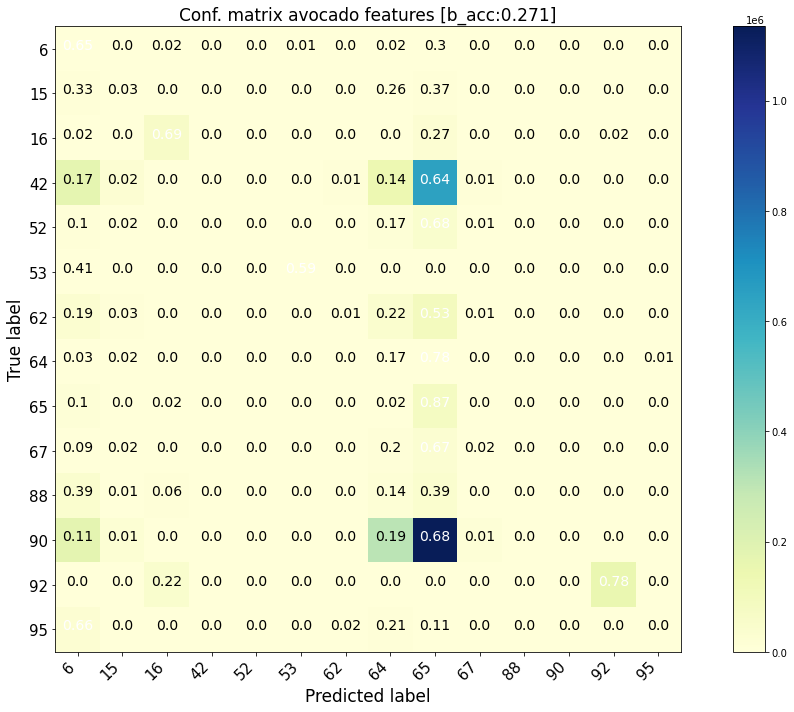

In [35]:
fig = plt.figure(figsize=(15, 10))
plot_confusion_matrix(conf, classes=classes, normalize=True,
                      title='Conf. matrix avocado features [b_acc:%.3f]' % acc)